In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sys,csv,os

In [5]:
import seaborn as sns

In [6]:
import re

In [7]:
import nltk 

In [8]:
from nltk.corpus import stopwords

In [9]:
from nltk.stem.porter import PorterStemmer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
from sklearn.svm import SVC

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from xgboost import XGBClassifier

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict, cross_validate, RandomizedSearchCV, learning_curve

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer, fbeta_score, matthews_corrcoef

In [22]:
from matplotlib.pyplot import cm

In [23]:
from funcsigs import signature

In [24]:
from sklearn.metrics import precision_recall_curve

In [25]:
from sklearn.metrics import average_precision_score

In [26]:
import seaborn as sns

In [27]:
from wordcloud import WordCloud

In [28]:
import nltk

In [29]:
from nltk.corpus import stopwords

In [30]:
import string

In [31]:
from nltk.tokenize import word_tokenize

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
df1 = pd.read_csv('datasetsYoutube01-Psy_input.tsv',delimiter = '\t', quoting = 3)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [35]:
df1.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [36]:
df1.shape

(350, 5)

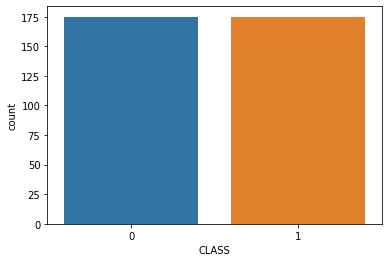

In [37]:
sns.countplot(x='CLASS', data=df1)

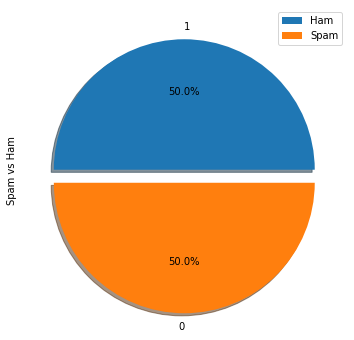

In [38]:
df1['CLASS'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [39]:
def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words

In [40]:
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

In [41]:
spam_messages = df1[df1["CLASS"] == 1]["CONTENT"]
ham_messages = df1[df1["CLASS"] == 0]["CONTENT"]

In [42]:
len(spam_messages), len(ham_messages)

(175, 175)

In [43]:
spam_words = []
ham_words = []


In [44]:
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\NIVETHA/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\NIVETHA\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df1 = pd.read_csv('datasetsYoutube02-KatyPerry_input.tsv',delimiter = '\t', quoting = 3)

In [ ]:
df1.info()

In [ ]:
df1.head()

In [ ]:
df1.shape

In [ ]:
sns.countplot(x='CLASS', data=df1)

In [ ]:
df1['CLASS'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
spam_messages = df1[df1["CLASS"] == 1]["CONTENT"]
ham_messages = df1[df1["CLASS"] == 0]["CONTENT"]

In [ ]:
spam_words = []
ham_words = []

In [ ]:
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

In [ ]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df1 = pd.read_csv('datasetsYoutube04-Eminem_input.tsv',delimiter = '\t', quoting = 3, skiprows = range(270,276), )

In [ ]:
df1.info()

In [ ]:
df1.head()

In [ ]:
df1.shape

In [ ]:
sns.countplot(x='CLASS', data=df1)

In [ ]:
df1['CLASS'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
spam_messages = df1[df1["CLASS"] == 1]["CONTENT"]
ham_messages = df1[df1["CLASS"] == 0]["CONTENT"]

In [ ]:
spam_words = []
ham_words = []

In [ ]:
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

In [ ]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df1 = pd.read_csv('datasetsYoutube05-Shakira_input.tsv',delimiter = '\t', quoting = 3)

In [ ]:
df1.info()

In [ ]:
df1.head()

In [ ]:
df1.shape

In [ ]:
sns.countplot(x='CLASS', data=df1)

In [ ]:
df1['CLASS'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
spam_messages = df1[df1["CLASS"] == 1]["CONTENT"]
ham_messages = df1[df1["CLASS"] == 0]["CONTENT"]

In [ ]:
spam_words = []
ham_words = []

In [ ]:
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

In [ ]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df1 = pd.read_csv('datasetsYoutube03-LMFAO_input.tsv',delimiter = '\t', quoting = 3)

In [ ]:
df1.info()

In [ ]:
df1.head()

In [ ]:
df1.shape

In [ ]:
sns.countplot(x='CLASS', data=df1)

In [ ]:
df1['CLASS'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
spam_messages = df1[df1["CLASS"] == 1]["CONTENT"]
ham_messages = df1[df1["CLASS"] == 0]["CONTENT"]

In [ ]:
spam_words = []
ham_words = []

In [ ]:
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

In [ ]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
classifiers = [
{
    'label': 'Logistic Regression Classifier',
    'model': LogisticRegression(),
    'parameters': {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 1, 10]},
    'g_cv' : 10
    
},
{
    'label': 'Naive- Bayes Classifier',
    'model': GaussianNB(),
    'parameters': {},
    'g_cv' : 10
    
},
{
    'label': 'Support Vector Classifier',
    'model': SVC(),
    'parameters': {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
    'g_cv' : 10
},
{
    'label': 'K-Nearest Neighbor',
    'model': KNeighborsClassifier(),
    'parameters':{"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'g_cv' : 10
},
{
    'label': 'Decision Tree Classifier',
    'model': DecisionTreeClassifier(),
    'parameters': {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
    'g_cv' : 10
    
},
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(),
    'parameters': { 'n_estimators': [10,100,300,500],
                   "criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
    'g_cv' : 5    
 },

{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(),
    'parameters': { 'learning_rate': [0.01], 'n_estimators':[100,500],
                   'gamma': [0.5, 1, 1.5], 'subsample': [0.6, 0.8, 1.0], 
                   'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [2]},
    'g_cv' : 2
    
}
]

In [ ]:
def convert_to_tsv(csv_file, tsv_file):
         
    csv.writer(open(tsv_file, 
                    'w+',
                    encoding="utf-8"),
    delimiter='\t').writerows(csv.reader(open(csv_file,
                              encoding="utf8")))
    return tsv_file

In [ ]:
def create_corpus(dataset):
    corpus = [] 
    for i in range(0,len(dataset)):
       
        comment = re.sub(pattern = '[^a-zA-Z]',repl = ' ' , string = str(dataset['CONTENT'][i])) 
        
        comment = comment.lower() 
        
        comment = comment.split() 
        
        ps = PorterStemmer()
        comment = [ps.stem(word) for word in comment if not word in set(stopwords.words('english'))] 
        
        comment =' '.join(comment)
        corpus.append(comment)
    return corpus

Function to create the Bag of Words model from corpus

In [ ]:
def bag_of_words(corpus):
    cv = CountVectorizer()
    X = cv.fit_transform(corpus).toarray() 
    
    cv = CountVectorizer(max_features = (X.shape[1] - 50))
    X = cv.fit_transform(corpus).toarray() 
    y = dataset.iloc[:,-1].values

    return X,y

Function to find the optimized Classifiers - Using GridSearchCV

In [ ]:
def best_estimator(classifiers, X_train, y_train, filename):
    scoring = {'acc': 'accuracy',
               'AUC': 'roc_auc',
              'prec_macro': 'precision_macro',
               'rec_micro': 'recall_micro',
               'f1_score': 'f1_micro'}
    best_estimators = dict()
    best_scores_df = pd.DataFrame()
     
    for c in classifiers:
            classifier = c['model']
            label = c['label']
            print('\n\n Optimized ', label, 'for ', filename)
            print('---------------------------------------')
            
            grid_search = GridSearchCV(estimator = classifier,
                       param_grid = c['parameters'],
                       scoring = scoring,
                       refit='acc',
                       cv = c['g_cv'],
                       return_train_score=True,
                       verbose =1)
            if label == 'Random Forest Classifier':
                grid_search.fit(X_train, y_train, sample_weight = None)
            else:
                grid_search.fit(X_train, y_train)
            results = grid_search.cv_results_
            print('\n')
            print('Best Parameters: ',grid_search.best_params_)
            
            best_estimators[label] = grid_search.best_estimator_
            
            data = [[label, round(grid_search.best_score_*100,2)]]
            df2 = pd.DataFrame(data, columns = ['Classifier','Accuracy']) 
            best_scores_df = best_scores_df.append(df2)
            
            
            print('\n')
            for key,scorer in scoring.items():
                for sample in ('train','test'):
                    sample_score_mean = round(results['mean_%s_%s' % (sample, key)].mean()*100,2)
                    sample_score_std = round(results['std_%s_%s' % (sample, key)].mean()*100,2)
                    if(sample == 'train'):
                        to_print = 'Training'
                    else:
                        to_print = 'Validation'
                    print(to_print,' ',scorer,' : ',sample_score_mean, '% (+/-)', sample_score_std,'%')
                print('\n')
                   
            print('-----------------------------------------')
                
    print('Comparing the Best Cross-Validated Accuracy between Classifiers')
    best_scores_df
    return best_estimators

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
                     
   

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
def simple_fit_predict(classifiers, best_estimators, X_train, X_test, y_train, y_test, filename):
    
    print('Validation Scores:\n')
    y_preds = dict()
    for key, model in best_estimators.items():
        #classifier = c
        label = model.__class__.__name__
        if label == 'Random Forest Classifier':
            model.fit(X_train, y_train, weight = None)
        else:
            model.fit(X_train, y_train)    
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        y_preds[label] = test_predictions
        
        print('Predicting test data for ', filename,': Using ',label)
        print('\n')
        print('Precision:')
        print('Training score: ',round(precision_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(precision_score(test_predictions,y_test)*100,2),'%')
        print('Recall:')
        print('Training score: ',round(recall_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(recall_score(test_predictions,y_test)*100,2),'%')
        print('F1 Score:')
        print('Training score: ',round(f1_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(f1_score(test_predictions,y_test)*100,2),'%')
        print('Accuracy:')
        print('Training score: ',round(accuracy_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(accuracy_score(test_predictions,y_test)*100,2),'%')
        print('==========================================')
        print('\n')
    return y_preds

In [ ]:
def roc_curves(classifiers, best_estimators, X_test, y_test, filename):
    
    color=iter(cm.rainbow(np.linspace(0,15,100)))
    for key, model in best_estimators.items():
        y_pred = model.predict(X_test)
        if hasattr(model, "decision_function"):
            y_pred = model.decision_function(X_test)
        else:
            y_pred = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc = roc_auc_score(y_test,y_pred)
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model.__class__.__name__, auc))
    
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic - '+ filename)
    plt.legend(loc="lower right")
    plt.show()               

In [ ]:
def get_confusion_matrix_values(y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])


In [ ]:
def performance_comparison(best_estimators, y_preds, y_test, filename):
    
    df = pd.DataFrame()
    df1=[]
    for key, y_pred in y_preds.items():
        label = key
        
        TN, FP, FN, TP = get_confusion_matrix_values(y_test, y_pred)
        
        precision = round(TP/ (TP + FP)*100,2)
        recall = round(TP / (TP + FN)*100,2)
        accuracy = round((TP+TN)/(TP+TN+FP+FN)*100,2)
        spam_caught_rate = round(TP/ (TP+FP)*100,2)
        blocked_ham = round(FN / (TN + FN)*100,2)
        matthews_coefficient = round(matthews_corrcoef(y_test, y_pred)*100,2) 
        f1_score = round(2 * precision * recall/(precision + recall),2)
        
        data = [[label, accuracy, spam_caught_rate, blocked_ham, matthews_coefficient, f1_score]]
        df2 = pd.DataFrame(data, columns = ['Classifier','Accuracy','Spam_Caught_Rate', 'Blocked_Ham','Matthews_Coefficient', 'F1 Score']) 
        df1.append(df2)
        
    df = pd.concat(df1,ignore_index = True)
    return df

In [ ]:
base_dir = './datasets'

In [ ]:
data_files = [os.path.join(base_dir,f) for f in os.listdir(base_dir)] 

In [ ]:
files = os.listdir(base_dir)

In [ ]:
input_dir = base_dir

In [ ]:
df = pd.DataFrame()

In [ ]:
df_all = pd.DataFrame()

In [ ]:
df_list =[]

In [ ]:
for csv_file,file in zip(data_files, files):
    filename, file_extension = os.path.splitext(file)
    tsv_file = input_dir+ filename + '_input.tsv'
    
    print('PROCESSING DATASET.........', filename)
    print('===========================================================\n')
        
    input_file = convert_to_tsv(csv_file, tsv_file)
    
    if filename == 'Youtube04-Eminem':
        dataset = pd.read_csv(input_file,delimiter = '\t', skiprows = range(270,276), quoting = 3)
    else:
        dataset = pd.read_csv(input_file,delimiter = '\t', quoting = 3)
    print(dataset.head())

    print('APPLYING NLP ON .........', filename)
    print('===========================================================\n')
       
    corpus = create_corpus(dataset)
    
    X,y = bag_of_words(corpus)

    print('SPLITTING INTO TRAIN AND TEST.........', filename)
    print('===========================================================\n')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    print('OPTIMIZATION OF CLASSIFIERS THROUGH GRIDSEARCHCV FOR ', filename)
    print('===========================================================\n')
    try:
        best_estimators = best_estimator(classifiers, X_train, y_train, filename)

        print('FITTING THE BEST CLASSIFIER AND PREDICTING TEST SET RESULT FOR ', filename)
        print('===========================================================\n')

        y_preds = simple_fit_predict(classifiers,best_estimators, X_train, X_test, y_train, y_test, filename)

        print('PERFORMANCE COMPARISON OF CLASSIFIERS FOR ', filename)
        print('===========================================================\n')

        df = performance_comparison(best_estimators, y_preds, y_test, filename)
        print(df.head(8))

        df_list.append(df)
        print('===========================================================')

        roc_curves(classifiers, best_estimators, X_test, y_test, filename)  
    except:
        pass

#df_all = pd.concat(df_list, ignore_index = True)
    

In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
from tabulate import tabulate
print('======================================\n')
print('FINAL PERFORMANCE COMPARISON GRID\n')
print('======================================\n')
headers = ['Classifier','Accuracy','Spam Caught','Blocked Ham','Mathews Coeff','F1 Score']
[print("Dataset Name: ",f,"\n\n",tabulate(x, headers = headers, tablefmt='psql', numalign="right",floatfmt=".2f"),"\n\n") for f,x in zip(files,df_list)]